In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 3. Load result into a Pandas DataFrame
df = pd.read_csv("unzippedData/tmdb.movies.csv")
df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [3]:
#Handle duplicates
df = df.drop_duplicates(subset=['id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25497 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         25497 non-null  int64  
 1   genre_ids          25497 non-null  object 
 2   id                 25497 non-null  int64  
 3   original_language  25497 non-null  object 
 4   original_title     25497 non-null  object 
 5   popularity         25497 non-null  float64
 6   release_date       25497 non-null  object 
 7   title              25497 non-null  object 
 8   vote_average       25497 non-null  float64
 9   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [4]:
start_year,end_year = df['release_date'].min(),df['release_date'].max()
start_year,end_year

('1930-04-29', '2020-12-25')

In [5]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year
df['release_year'] = df['release_date'].dt.year

# Keep only 1990 onwards
df = df[df['release_year'] >= 1990]

# Drop original release_date
df = df.drop(columns=['release_date'])

df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,title,vote_average,vote_count,release_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,How to Train Your Dragon,7.7,7610,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,Iron Man 2,6.8,12368,2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,Toy Story,7.9,10174,1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,Inception,8.3,22186,2010


<Axes: >

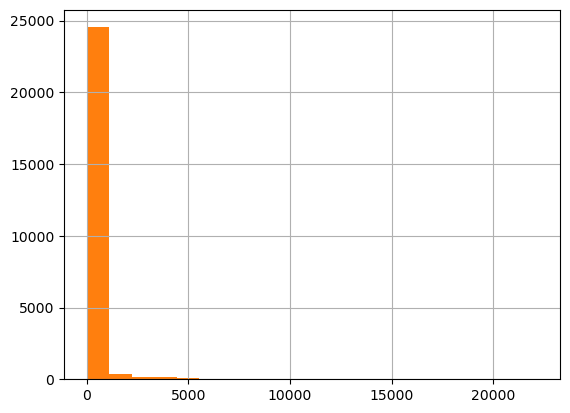

In [6]:
# Distribution of votes and ratings
df['vote_average'].hist(bins=20)
df['vote_count'].hist(bins=20)

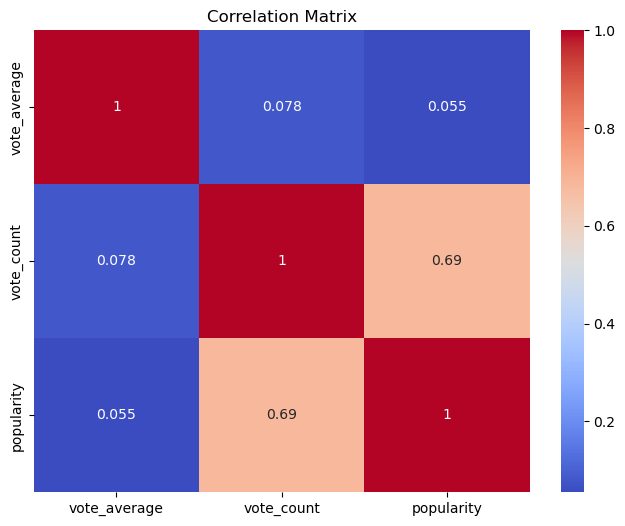

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['vote_average','vote_count','popularity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [8]:
#Huge correlation between vote_count,vote_average and popularity

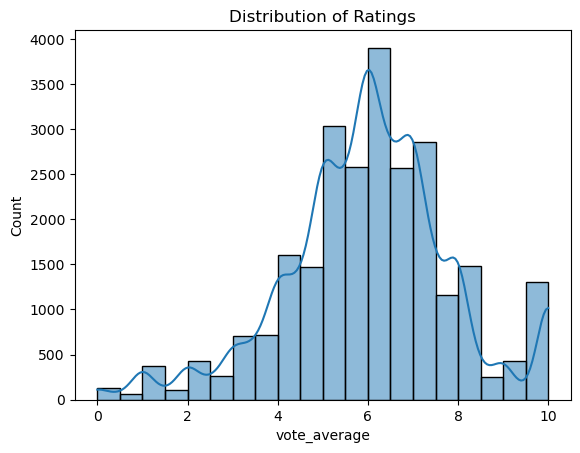

In [9]:
sns.histplot(df['vote_average'], kde=True, bins=20)
plt.title("Distribution of Ratings")
plt.show()

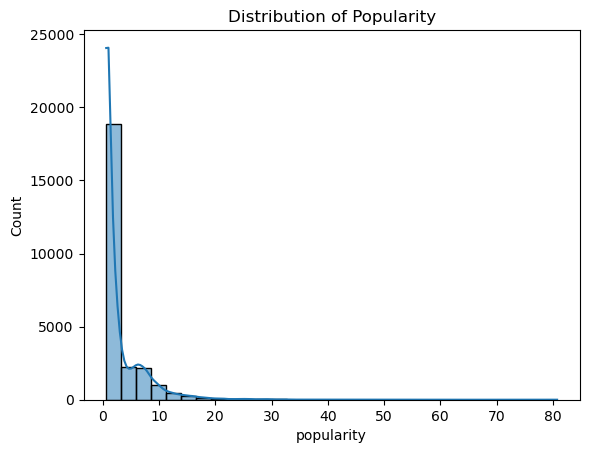

In [10]:
sns.histplot(df['popularity'], kde=True, bins=30)
plt.title("Distribution of Popularity")
plt.show()

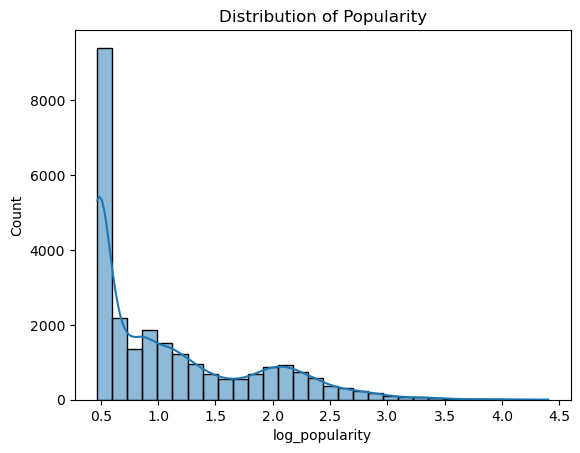

In [11]:
df['log_popularity'] = np.log1p(df['popularity'])
sns.histplot(df['log_popularity'], kde=True, bins=30)
plt.title("Distribution of Popularity")
plt.show()

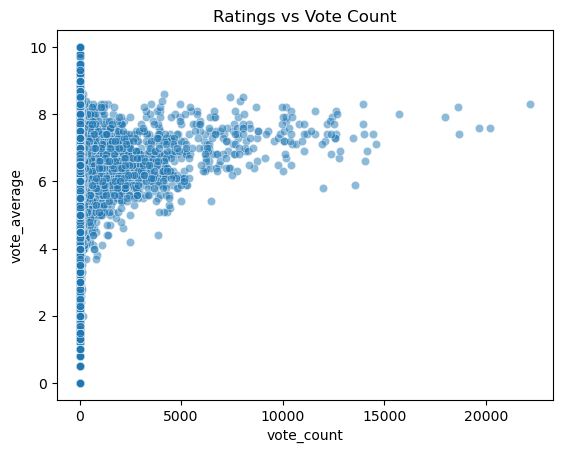

In [12]:
sns.scatterplot(x='vote_count', y='vote_average', data=df, alpha=0.5)
plt.title("Ratings vs Vote Count")
plt.show()

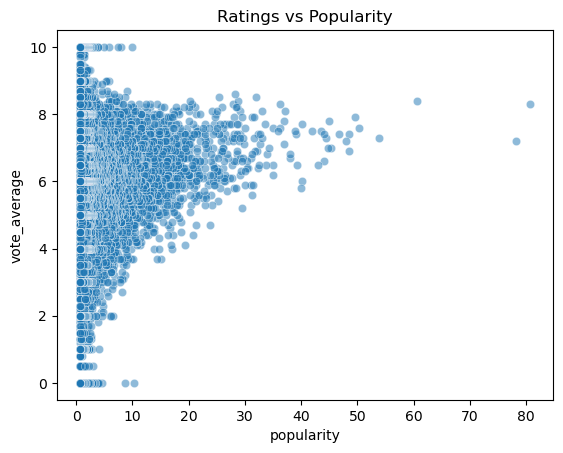

In [13]:
sns.scatterplot(x='popularity', y='vote_average', data=df, alpha=0.5)
plt.title("Ratings vs Popularity")
plt.show()

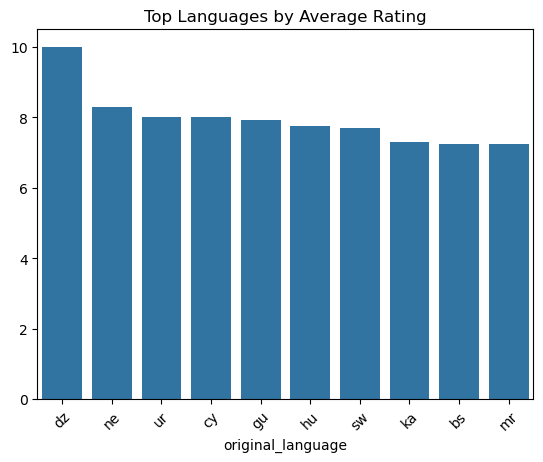

In [14]:
lang_means = df.groupby("original_language")["vote_average"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=lang_means.index, y=lang_means.values)
plt.title("Top Languages by Average Rating")
plt.xticks(rotation=45)
plt.show()

In [22]:
from scipy.stats import f_oneway

top_langs = df['original_language'].value_counts().head(5).index
samples = [df[df['original_language']==lang]['vote_average'] for lang in top_langs]

f_stat, p_val = f_oneway(*samples)
print(f"ANOVA F={f_stat:.2f}, p={p_val:.4g}")

ANOVA F=25.71, p=2.704e-21


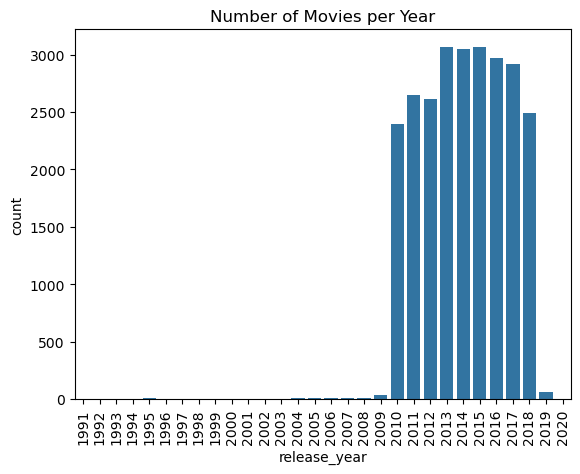

In [17]:

# Movies per year
sns.countplot(x='release_year', data=df, order=sorted(df['release_year'].unique()))
plt.xticks(rotation=90)
plt.title("Number of Movies per Year")
plt.show()


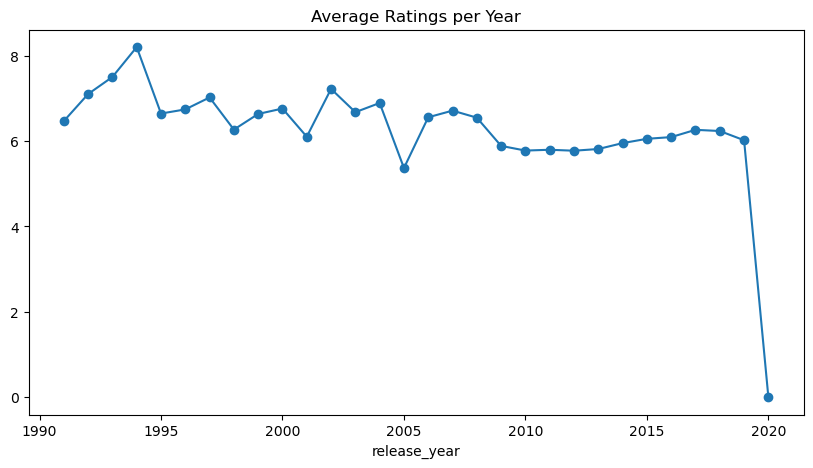

In [19]:

# Ratings per year
ratings_per_year = df.groupby('release_year')['vote_average'].mean()
ratings_per_year.plot(figsize=(10,5), marker='o')
plt.title("Average Ratings per Year")
plt.show()

In [20]:
df.to_csv("cleaned_tmdb.csv", index=False)